<a href="https://colab.research.google.com/github/HWP-Wilson/Tecnicas_desbalanceamento_Under_e_Over/blob/main/Tecnicas_desbalanceamento_Under_e_Over.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Técnicas utilizadas para desbalanceamento de datasets (tweets)
helanowilson@ufc.br

https://github.com/HWP-Wilson

Alguns datasets possuem um desequilibrio nas classes de seus dados. Ao se analisar, por exemplo, as compras com cartão de credito, o número de fraudes  é muito menor que as compras efetuadas de maneira legal ( Um bom material para a pesquisa sobre fraudes em cartões: https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/ ). Ao estudar  o perfil dos fraudadores, os modelos podem errar na sua perfomance, pois foram induzidos a trabalhar com um número grande de informações sobre as compras legais, e poucos dados sbre as compras fraudulentas.

Para amenizar isso existem duas técnicas básicas de balancear os dados:


*   Under-sampling
*   Over-sampling

Under-sampling: Consiste, de forma aleatória, eliminar os dados da classe majoritária de tal forma que se iguale a classe menor. 

 Over-sampling: "Cria" novos dados para as classe minoritárias, até que todas se igualem a classe maior. A criação de novos dados, no entanto, é replicação de dados já existentes. 

Dentro das duas técnicas citadas, existem tipos específicos:

*   Under-sampling: RandomUnderSample; NearMiss; OneSidedSelection (Algoritmo tipo KNN).

Nos dois primeiros tipos de Under-sampling, a quantidade de dados será a mesma. A forma de seleção é que varia. Como exemplo, temos o modelo NearMiss1 que seleciona exemplos da classe majoritária que têm a menor distância média para os três exemplos mais próximos da classe minoritária. Já no OneSidedSelection, o modelo também exclui dados da classe majoritária, mas pode-se ajustar a quantidade de dados das classes. 

*   Over-sampling: RandomOverSampler, SMOTE.

Em Over-sampling os critérios de replicação dos dados das classes minoritárias é que varia entre os modelos, por serem redundantes, por serem parecidos com classes minoritárias, enfim, são algoritmos específicos para esse fim e para melhor entender o funcionamento de cada um deles é necessário ler bastante suas documentações.   

Para comparação entre as técnicas de balanceamento serão utilizados:



*   Dataset com tweets em inglês. Classificados em 3 labels. 
*   Técnicas de balanceamento: Under-sampling e Over-sampling
*   Regressão logistica para comparação entre as técnicas acima. 





##Índice:
1. Dataset 
2. Dados balanceados - Análise de acurácia com regressão logistica
3. Análise com Under-sampling - RandomUnderSample
4. Análise com Over-sampling - RandomOverSample
5. Análise com outras técnicas - NearMiss; OneSidedSelection (Algoritmo tipo KNN) e SMOTE.
6. Resultados e conclusão.

In [ ]:
!pip install scikit-plot

In [23]:
# importando as bibliotecas e pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score 
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import scikitplot as skplt

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

##1. O dataset utilizado contém aproximadamente 25 mil tweets, em lingua inglesa, com 3 classes: 


*   Discurso de ódio (0)
*   Linguagem ofensiva (1)
*   Neutro (2)

Os dados já foram tratados previamente, com tecnicas de NLP, utlizando a biblioteca NLTK. Segue link com o processamento realizado:

https://github.com/HWP-Wilson/Classificador_de_Tweet-s_com_TFHub/blob/main/Classificador__de_tweets_com_TFHub.ipynb







In [ ]:
# importar os dados para um dataframe
df = pd.read_csv('data.csv')
df.head()

##1.1 Desbalanceamento das classes: 19190 tweets classificados como Discurso de ódio; 4163 como Linguagem ofensiva e apenas 1430 como tweet Neutro. 

1    19190
2     4163
0     1430
Name: class, dtype: int64


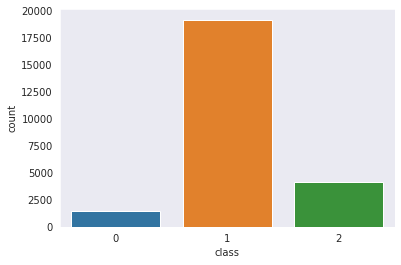

In [13]:
# ver o balanceamento das classes
print(df['class'].value_counts())
 
# plotar gráfico de barras para as Classes
sns.countplot('class', data=df);

##1.2 A coluna com os tweets será nossa entrada. As classes serão nossos rótulos. 

In [14]:
descriptions = df['tweet_definitivo']
genres =df['class']

In [15]:
descriptions = descriptions.astype('str')


##1.3 Vetorizando todos os tweets, pois os modelos de balanceamento não aceitam strings. A biblioteca utililizada foi a Sklear, através de CountVectorizer.

In [16]:
###Vetorizando com CountVectorizer
vectorizer = CountVectorizer(analyzer = "word")
train_encodedd = vectorizer.fit_transform(descriptions)

In [21]:
### O dataset permanece com 24783 linhas, porém aumentou consideravalmente o número de 
### colunas (por conta da vetorização)
train_encodedd.shape

(24783, 10901)

In [20]:
#Print de teste do primeiro tweet
print(train_encodedd[1])


  (0, 1131)	1
  (0, 2441)	2
  (0, 1883)	1
  (0, 9639)	1
  (0, 2821)	1
  (0, 678)	1
  (0, 2342)	1
  (0, 4794)	1
  (0, 4393)	1
  (0, 9157)	1
  (0, 7110)	1


##2. Dados desbalanceados - Análise do modelo.

A acurácia realizada atráves de modelo de regressão logistica foi de 89,12% com os dados desbalanceados. Na matriz de confusão, no entanto, fica evidente que o modelo funciona bem basicamente nos casos de linguagem ofensiva (classe 1), que é justamente a classe majoritária. 
Precision: avalia a capacidade do método em acertar a classe dentre todas as classes possíveis. Trabalha com todo o conjunto de dados. 
Recall: avalia a capacidade do modelo em acertar uma classe, utilizando como conjunto somente os pertencentes aquela classe. 

Exemplo1: Ao pegar aleatoriamente um tweet, ele acerta a classe 1 em 92,0% (precision). 
Ao pegar aleatoriamente um tweet da classe 1, ele acerta que é da 1 em 95,3% (recall)

Exemplo2: Ao pegar aleatoriamente um tweet, ele acerta a classe 0 em 43,8%. 
Ao pegar aleatoriamente um tweet da classe 0, ele acerta que é da 0 em apenas 23,0%. 

Um bom parâmetro para casos de dados balanceados é o F1.


1.1 Dados desbalanceados 

Nota-se que a classe "Discurso de ódio" (0) não tem bom rendimento nos parâmetros. Para efeito de moderação de comentarios em paginas, sites, twitterm Instagram, não é a situação ideal. Pois o modelo não reconhece a situação que precisa ser corrigida e limitada. 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.4385    0.2297    0.3015       357
           1     0.9205    0.9531    0.9365      4798
           2     0.8329    0.8329    0.8329      1041

    accuracy                         0.8912      6196
   macro avg     0.7306    0.6719    0.6903      6196
weighted avg     0.8780    0.8912    0.8825      6196

Acurácia: 0.8912



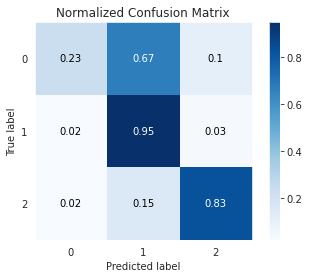

In [73]:
# separar variáveis entre X e y
X = train_encodedd
y = df['class']

# dividir o dataset entre treino e teste (Por padrão do Train_test_split, a proporção é de 75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

##3. Balanceamento dos dados com técnica Under-sampling
Essa técnica extrai um subconjunto aleatório da classe maior, tornando-a de mesmo tamanho da classe menor. É caracteristico dessa técnica a perda de acurácia, porém, ela melhora os resultados de precisão e recall nas classes que possuem menos dados. Ideal para detectação de fraudes em cartão de crédito (pois geralmente em dados sobre isso a minoria dos dados é fraude. No nosso caso, de detectação de ódio dos tweets, a maioria dos dados está como linguagem ofensiva (80%) e apenas 5% considerado neutro.

2.1 Técnica de Under-sampling (RandomUnderSampler)

Dados balanceados, sendo 1073 (test_size = 0.25) para cada classe. 
Os dados na classe minoritária ao todo são 1430. Logo, 75% é 1073. 


1    1073
2    1073
0    1073
dtype: int64


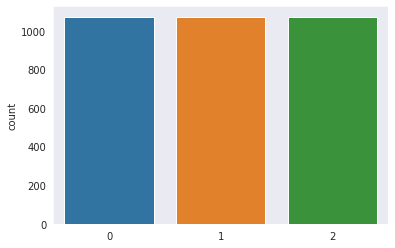

In [74]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

Agora, com os dados balanceados, a acurácia teve uma queda considerável, no entanto, as duas classes minoritárias tiveram melhora no Recall e F1.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.2166    0.7087    0.3318       357
           1     0.9703    0.7637    0.8547      4798
           2     0.7244    0.8713    0.7911      1041

    accuracy                         0.7786      6196
   macro avg     0.6371    0.7812    0.6592      6196
weighted avg     0.8856    0.7786    0.8139      6196

Acurácia: 0.7786



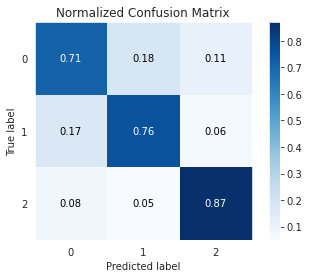

In [84]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression(max_iter=1000)
model_res.fit(X_res, y_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4)) 

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

##4. Análise com técnica Over-sampling

In [77]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random Oversampler
ros = RandomOverSampler(random_state = 32)
X_ros_res, y_ros_res = ros.fit_resample(X_train, y_train)


2    14392
1    14392
0    14392
dtype: int64


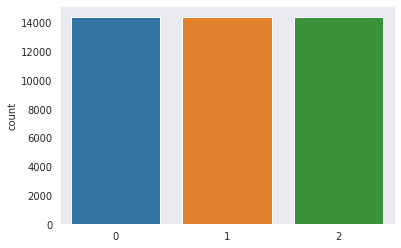

In [78]:
# ver o balanceamento das classes 
print(pd.Series(y_ros_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_ros_res);

Observa-se acima, na distribuição das classes no modelo de Over-sampling, que a quantidade de tweets utilizados (25%) é 14392. Portanto, temos aproximadamente 57.568 tweets nesse modelo. 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.2873    0.5126    0.3682       357
           1     0.9476    0.8712    0.9078      4798
           2     0.7796    0.8598    0.8177      1041

    accuracy                         0.8486      6196
   macro avg     0.6715    0.7479    0.6979      6196
weighted avg     0.8814    0.8486    0.8616      6196

Acurácia: 0.8486



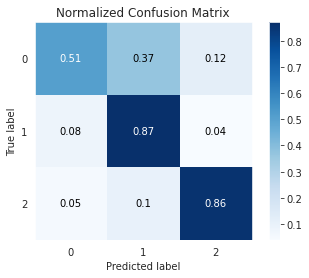

In [85]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression(max_iter=1000)
model_res.fit(X_ros_res, y_ros_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_ros_res = model_res.predict(X_test)
y_proba_ros_res = model_res.predict_proba(X_test)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_ros_res, digits=4)) 

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ros_res, normalize=True)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_ros_res)))

##5. Outras técnicas de Under-sampling


5.1 NearMiss (Under-sampling)

In [80]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
# NearMiss
nm = NearMiss(version=1)
X_nm_res, y_nm_res = nm.fit_resample(X_train, y_train)

1    1073
2    1073
0    1073
dtype: int64


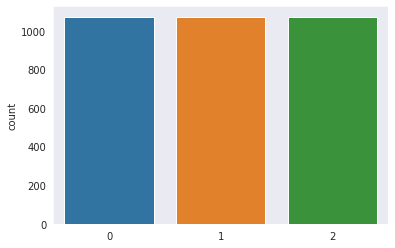

In [82]:
### Mesma quantidade de dados com RandomUnderSample, porém, com modelagem diferente. 
print(pd.Series(y_nm_res).value_counts())
sns.countplot(y_nm_res);

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.0967    0.7591    0.1716       357
           1     0.9687    0.4521    0.6165      4798
           2     0.7325    0.8127    0.7705      1041

    accuracy                         0.5303      6196
   macro avg     0.5993    0.6746    0.5195      6196
weighted avg     0.8788    0.5303    0.6167      6196

Acurácia: 0.5303



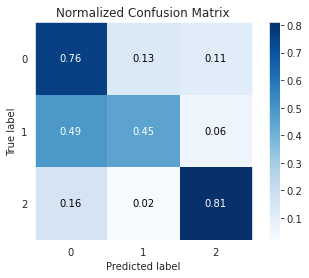

In [86]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_nm_res, y_nm_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_nm_res = model_res.predict(X_test)
y_proba_nm_res = model_res.predict_proba(X_test)
 
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_nm_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nm_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_nm_res)))

5.2 OneSidedSelection (Algoritmo tipo KNN) - Under-sampling

In [64]:
# OneSidedSelection (Algoritmo tipo KNN)
oss = OneSidedSelection(n_neighbors=1, n_seeds_S=1000)
X_oss_res, y_oss_res = oss.fit_resample(X_train, y_train)


1    5999
2    2016
0    1073
dtype: int64


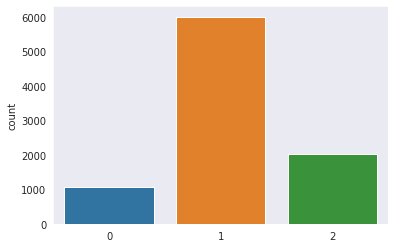

In [65]:
print(pd.Series(y_oss_res).value_counts())
sns.countplot(y_oss_res);

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8386    0.5238    0.6448       357
           1     0.9564    0.9827    0.9694      4798
           2     0.9358    0.9376    0.9367      1041

    accuracy                         0.9487      6196
   macro avg     0.9102    0.8147    0.8503      6196
weighted avg     0.9461    0.9487    0.9452      6196

Acurácia: 0.9487



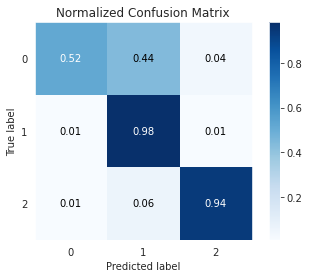

In [87]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression(max_iter=1000)
model_res.fit(X_oss_res, y_oss_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_oss_res = model_res.predict(X_test)
y_proba_oss_res = model_res.predict_proba(X_test)
 
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_oss_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_oss_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_oss_res)))

5.3 SMOTE (Over-sampling)

2    14392
1    14392
0    14392
dtype: int64


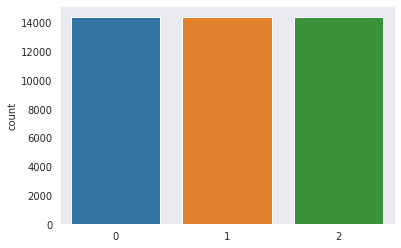

In [70]:
# SMOTE 
smote = SMOTE(random_state = 32)
X_smote_res, y_smote_res = smote.fit_resample(X_train, y_train)
print(pd.Series(y_smote_res).value_counts())
sns.countplot(y_smote_res);

Acurácia: 0.9057

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.4415    0.6134    0.5135       357
           1     0.9624    0.9231    0.9423      4798
           2     0.8780    0.9260    0.9014      1041

    accuracy                         0.9057      6196
   macro avg     0.7606    0.8209    0.7857      6196
weighted avg     0.9182    0.9057    0.9107      6196



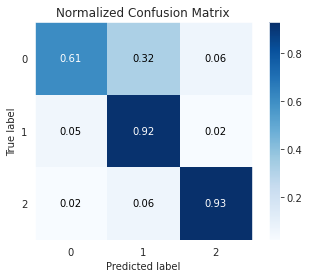

In [90]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression(max_iter=1000)
model_res.fit(X_smote_res, y_smote_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_smote_res = model_res.predict(X_test)
y_proba_smote_res = model_res.predict_proba(X_test)
 
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smote_res, normalize=True)

 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_smote_res)))

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_smote_res, digits=4))

##6. Resultados



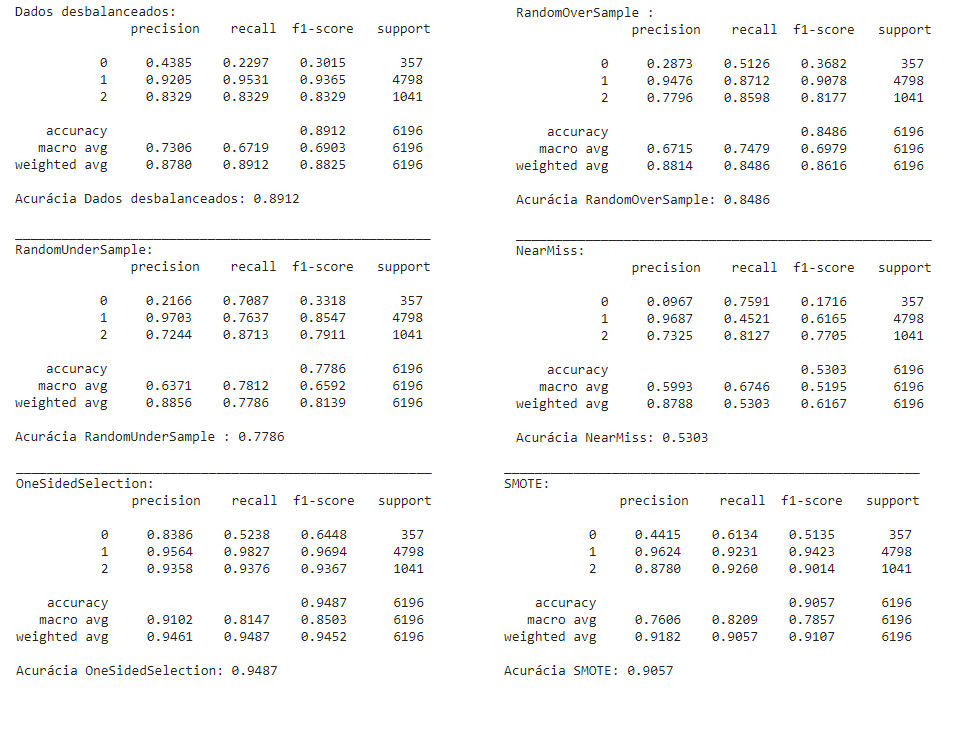

Pode-se concluir que as técnicas de balanceamento dos dados, entre as mais básicas (Under e Over), se assemelharam nos parâmetros obtidos com os dados de forma desbalanceada. A técnica NearMiss1 foi a de pior desempenho para esse dataset. Já as técnicas mais avançadas, SMOTE (Over-sampling) e OneSidedSelectio (Under-sampling ajustável) demonstraram melhorias nos parâmetros, com a OneSidedSelection se sobressaindo. 

Não existe uma técnica melhor, existem situações que cada uma se ajusta melhor. Vale ressaltar que utilizei apenas um modelo (Regressão Logística), possivelmente as técnicas estudadas aqui tenham outros comportamentos ao rodarem em outros modelos. 